In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Variables
points = 20

# Define the system
F = [[0.2, 0.4], [-0.4, 1]]
G = np.array([[0], [1]])

u = np.array([1])
x_0 = np.transpose([10, 20])
Q = np.diag([1, 2])

# Simulate the system
x = np.zeros((2, points))
x[:, 0] = x_0


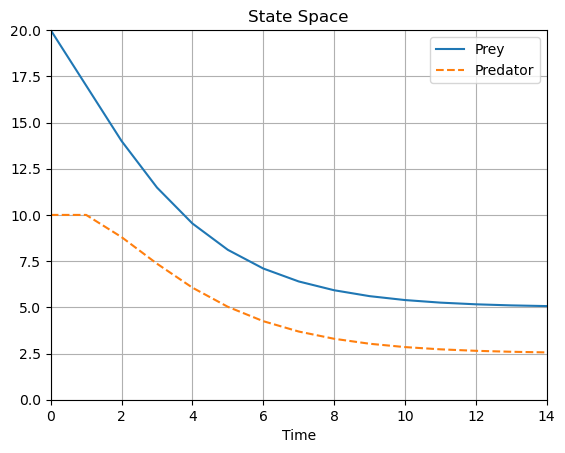

In [48]:
for i in range(1, points):
    w = np.reshape(np.random.multivariate_normal([0, 0], Q), (1, 2))
    x[:, i] = (F @ x[:, i-1] + G @ u)

# Plot the results
plt.plot(range(20), x[1, :], label='Prey')
plt.plot(range(20), x[0, :], linestyle='--', label='Predator')
plt.xlabel('Time')
plt.title('State Space')
plt.grid()
plt.ylim(0, 20), plt.xlim(0, 14), plt.legend()
plt.show()
